In [69]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [70]:
df = pd.read_csv('UCI_Credit_Card.csv')

In [71]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [72]:
df.drop(['ID'], axis = 1, inplace = True)

In [73]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [74]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [75]:
df.rename(columns={'default.payment.next.month': 'DEFAULT'}, inplace = True)

In [76]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [77]:
#df.iloc[0, 4] = 25

In [78]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [79]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  float64
 1   SEX        30000 non-null  int64  
 2   EDUCATION  30000 non-null  int64  
 3   MARRIAGE   30000 non-null  int64  
 4   AGE        30000 non-null  int64  
 5   PAY_0      30000 non-null  int64  
 6   PAY_2      30000 non-null  int64  
 7   PAY_3      30000 non-null  int64  
 8   PAY_4      30000 non-null  int64  
 9   PAY_5      30000 non-null  int64  
 10  PAY_6      30000 non-null  int64  
 11  BILL_AMT1  30000 non-null  float64
 12  BILL_AMT2  30000 non-null  float64
 13  BILL_AMT3  30000 non-null  float64
 14  BILL_AMT4  30000 non-null  float64
 15  BILL_AMT5  30000 non-null  float64
 16  BILL_AMT6  30000 non-null  float64
 17  PAY_AMT1   30000 non-null  float64
 18  PAY_AMT2   30000 non-null  float64
 19  PAY_AMT3   30000 non-null  float64
 20  PAY_AM

In [80]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [81]:
#df.drop(df[df['MARRIAGE'] == 0].index, axis = 0,inplace = True)

In [82]:
df[df['MARRIAGE'] == 3]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
15,50000.0,2,3,3,23,1,2,0,0,0,...,28771.0,29531.0,30211.0,0.0,1500.0,1100.0,1200.0,1300.0,1100.0,0
51,100000.0,2,3,3,43,0,0,0,0,0,...,39619.0,35762.0,33258.0,2000.0,1606.0,1500.0,2000.0,1500.0,1000.0,0
80,470000.0,2,3,3,33,0,0,0,0,0,...,69923.0,29271.0,29889.0,6400.0,7566.0,3000.0,960.0,1000.0,3000.0,0
239,140000.0,2,2,3,41,0,0,0,0,0,...,19068.0,16409.0,16383.0,3000.0,2000.0,2198.0,1000.0,3000.0,2399.0,1
373,30000.0,1,3,3,54,0,0,0,0,0,...,23221.0,24339.0,25943.0,2500.0,2000.0,1500.0,4000.0,2000.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29282,80000.0,2,1,3,25,0,-1,-1,-1,-1,...,478.0,219.0,0.0,1136.0,727.0,478.0,219.0,0.0,0.0,0
29509,200000.0,1,2,3,41,0,0,0,2,2,...,116278.0,128087.0,125931.0,3864.0,14269.0,0.0,13808.0,0.0,4600.0,0
29612,20000.0,1,2,3,47,-1,-1,2,2,-1,...,0.0,780.0,0.0,780.0,0.0,0.0,780.0,0.0,0.0,1
29745,20000.0,1,2,3,40,0,0,0,-1,-1,...,20000.0,0.0,780.0,1500.0,1000.0,20000.0,0.0,390.0,0.0,0


In [83]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [84]:
# dict_marriage = df['AGE'].value_counts().to_dict()
# # for i, j in dict_marriage.items():
# #     dict_marriage[i] = j // len(df['AGE'])
# # dict_marriage
# # for i in dict_marriage.keys():
# #     dict_marriage[i] = round((dict_marriage[i] * i) / len(df), 3)
# dict_marriage

In [85]:
dict_marriage_short = dict()

In [86]:
# for i in dict_marriage.keys():
#     if i <= 25:
#         dict_marriage_short[i] = 1
#     elif i <= 35:
#         dict_marriage_short[i] = 2
#     elif i <= 45:
#         dict_marriage_short[i] = 3
#     elif i <= 55: 
#         dict_marriage_short[i] = 4
#     elif i <= 65: 
#         dict_marriage_short[i] = 5
#     else: 
#         dict_marriage_short[i] = 6
        

In [87]:
dict_marriage_short 

{}

In [88]:
#df['AGE'] = df['AGE'].map(dict_marriage)

In [89]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [90]:
df.iloc[:, :11].describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [91]:
min(df['LIMIT_BAL']), max(df['LIMIT_BAL']), np.mean(df['LIMIT_BAL'])

(10000.0, 1000000.0, 167484.32266666667)

In [92]:
df.SEX.unique()

array([2, 1], dtype=int64)

In [93]:
df.MARRIAGE.unique()

array([1, 2, 3, 0], dtype=int64)

In [94]:
df.AGE.unique()

array([24, 26, 34, 37, 57, 29, 23, 28, 35, 51, 41, 30, 49, 39, 40, 27, 47,
       33, 32, 54, 58, 22, 25, 31, 46, 42, 43, 45, 56, 44, 53, 38, 63, 36,
       52, 48, 55, 60, 50, 75, 61, 73, 59, 21, 67, 66, 62, 70, 72, 64, 65,
       71, 69, 68, 79, 74], dtype=int64)

In [95]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

<Figure size 1512x1512 with 0 Axes>

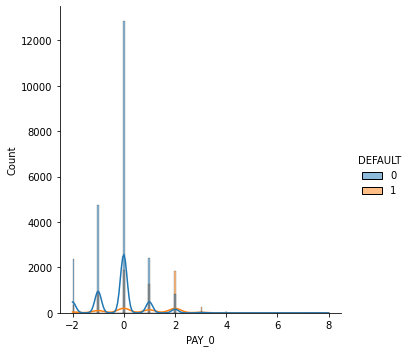

In [96]:
plt.figure(figsize = (21, 21))
sns.displot(df ,x = 'PAY_0', hue = 'DEFAULT', kde=True)
plt.show()

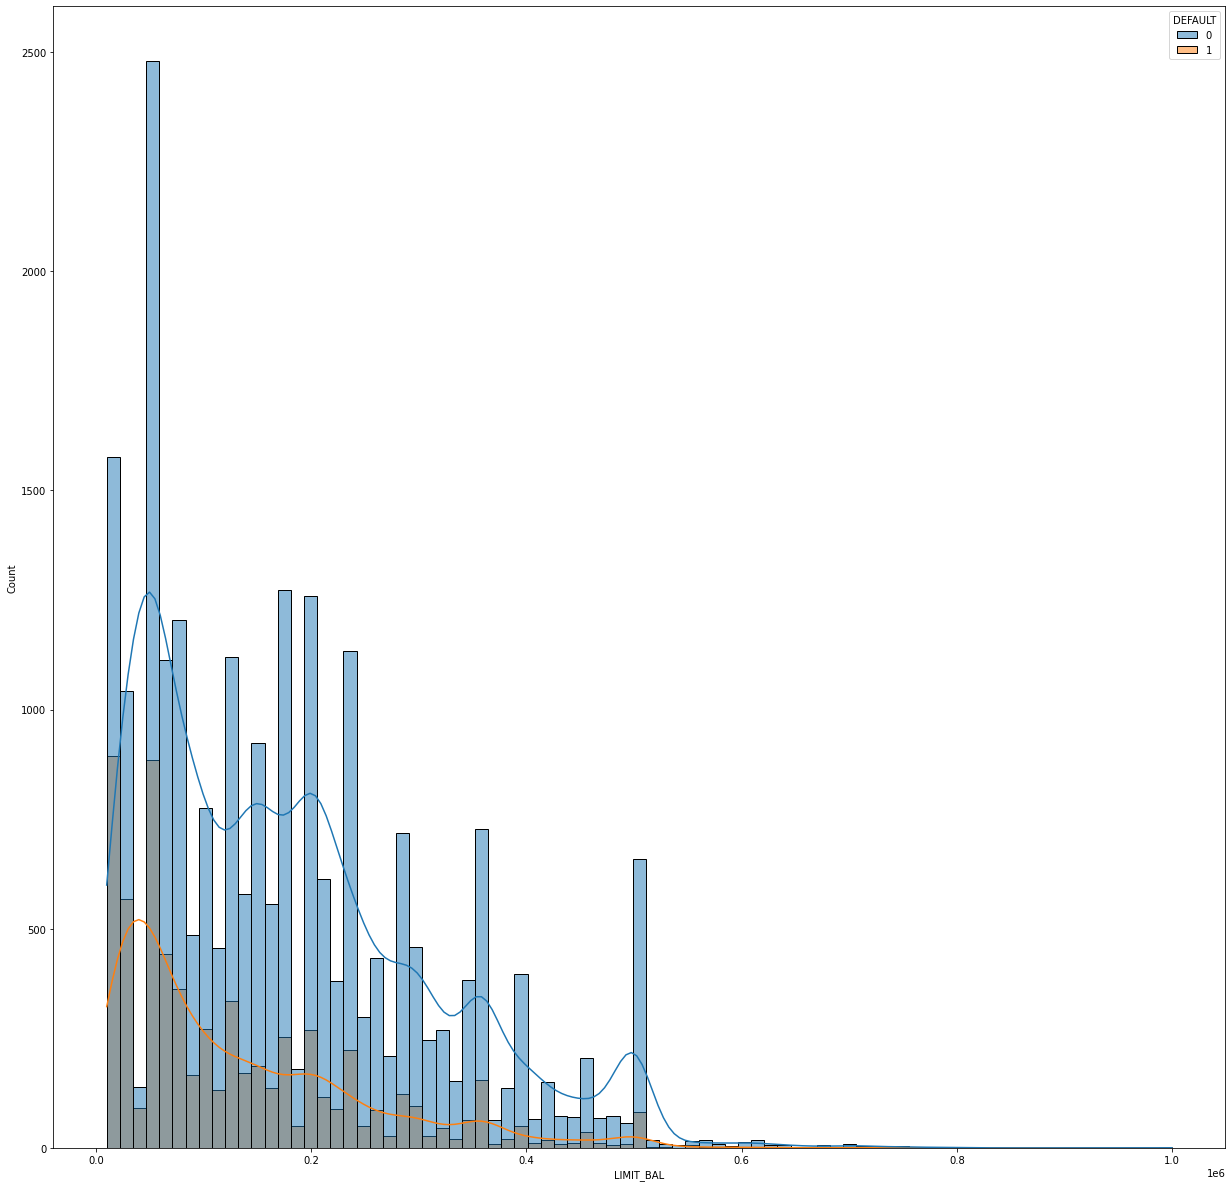

In [97]:
plt.figure(figsize = (21, 21))
sns.histplot(df ,x = 'LIMIT_BAL', hue = 'DEFAULT', kde=True)
plt.show()

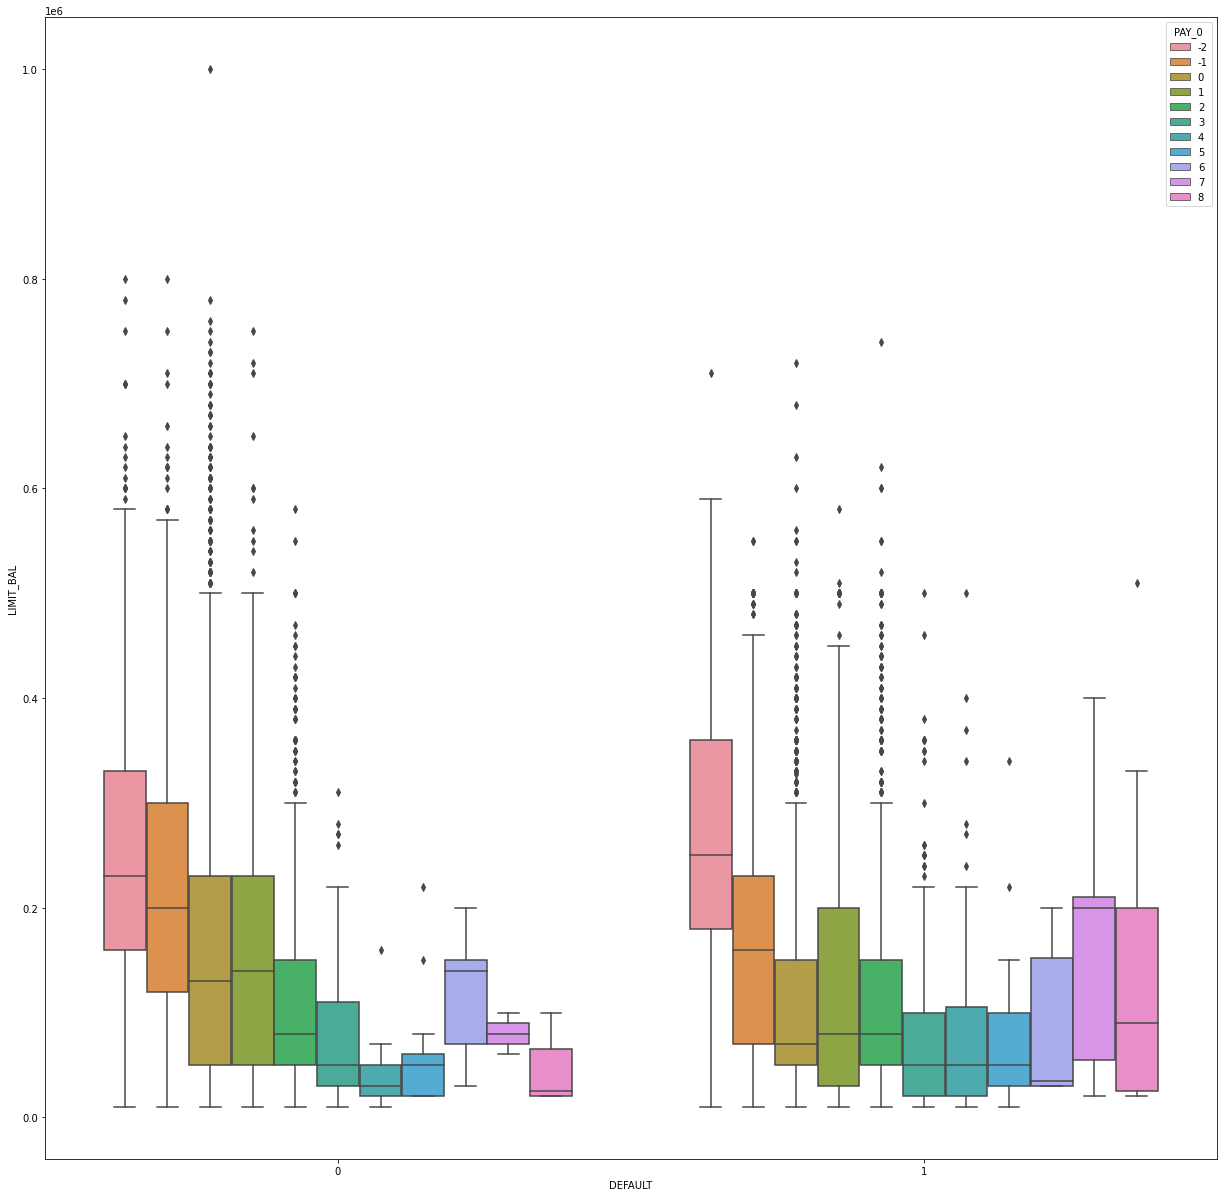

In [98]:
plt.figure(figsize = (21, 21))
sns.boxplot(data = df, y = "LIMIT_BAL", x = "DEFAULT", hue = 'PAY_0')
plt.show()

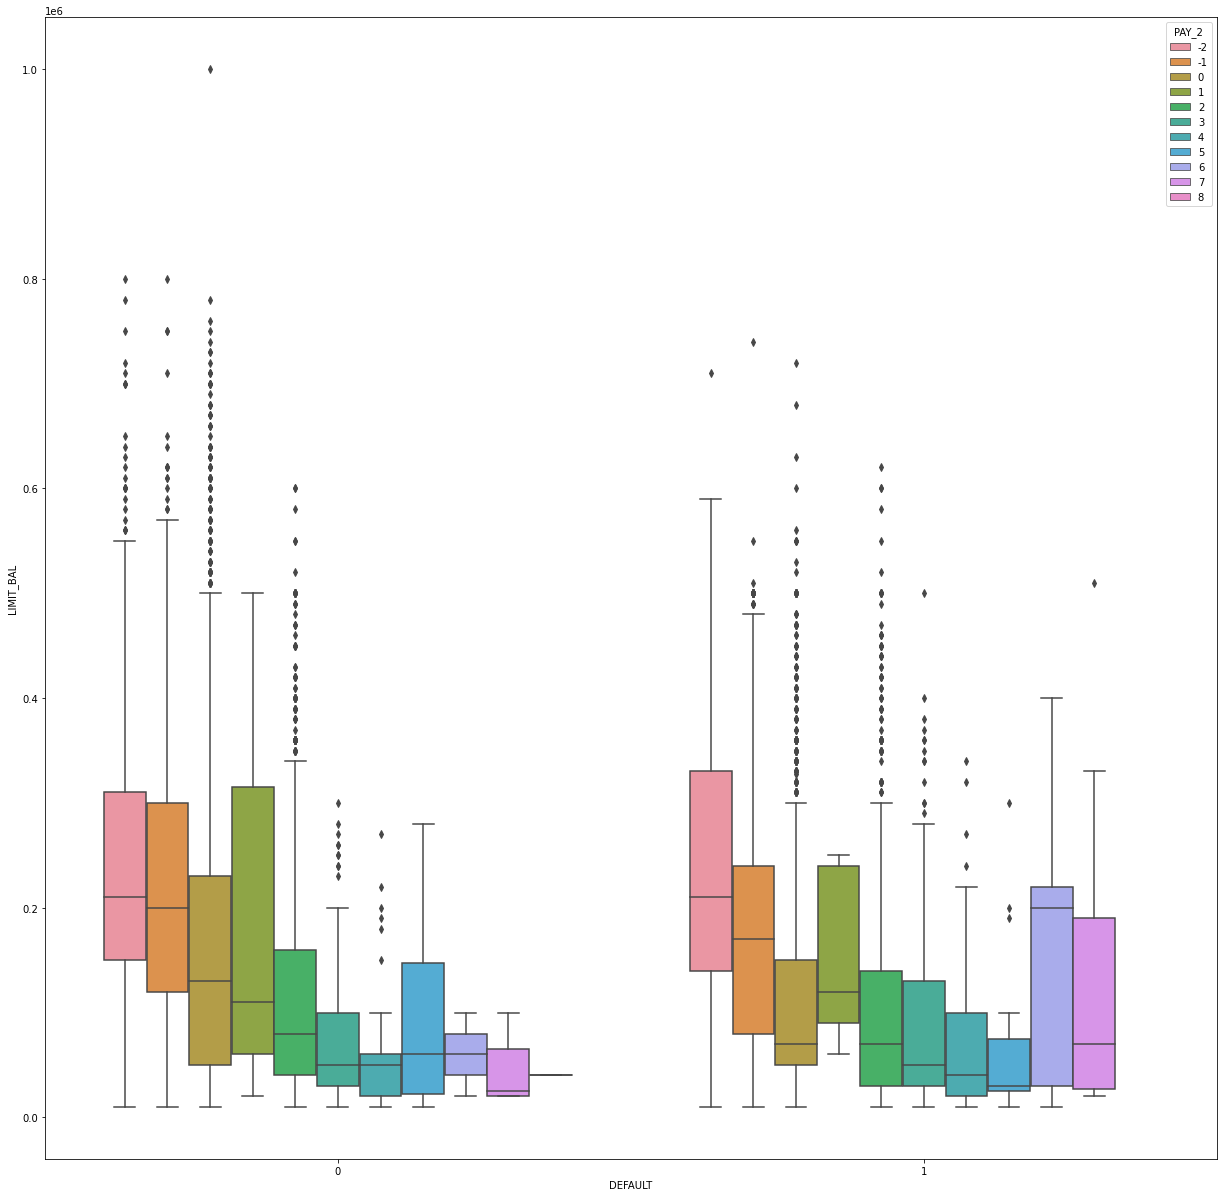

In [99]:
plt.figure(figsize = (21, 21))
sns.boxplot(data = df, y = "LIMIT_BAL", x = "DEFAULT", hue = 'PAY_2')
plt.show()

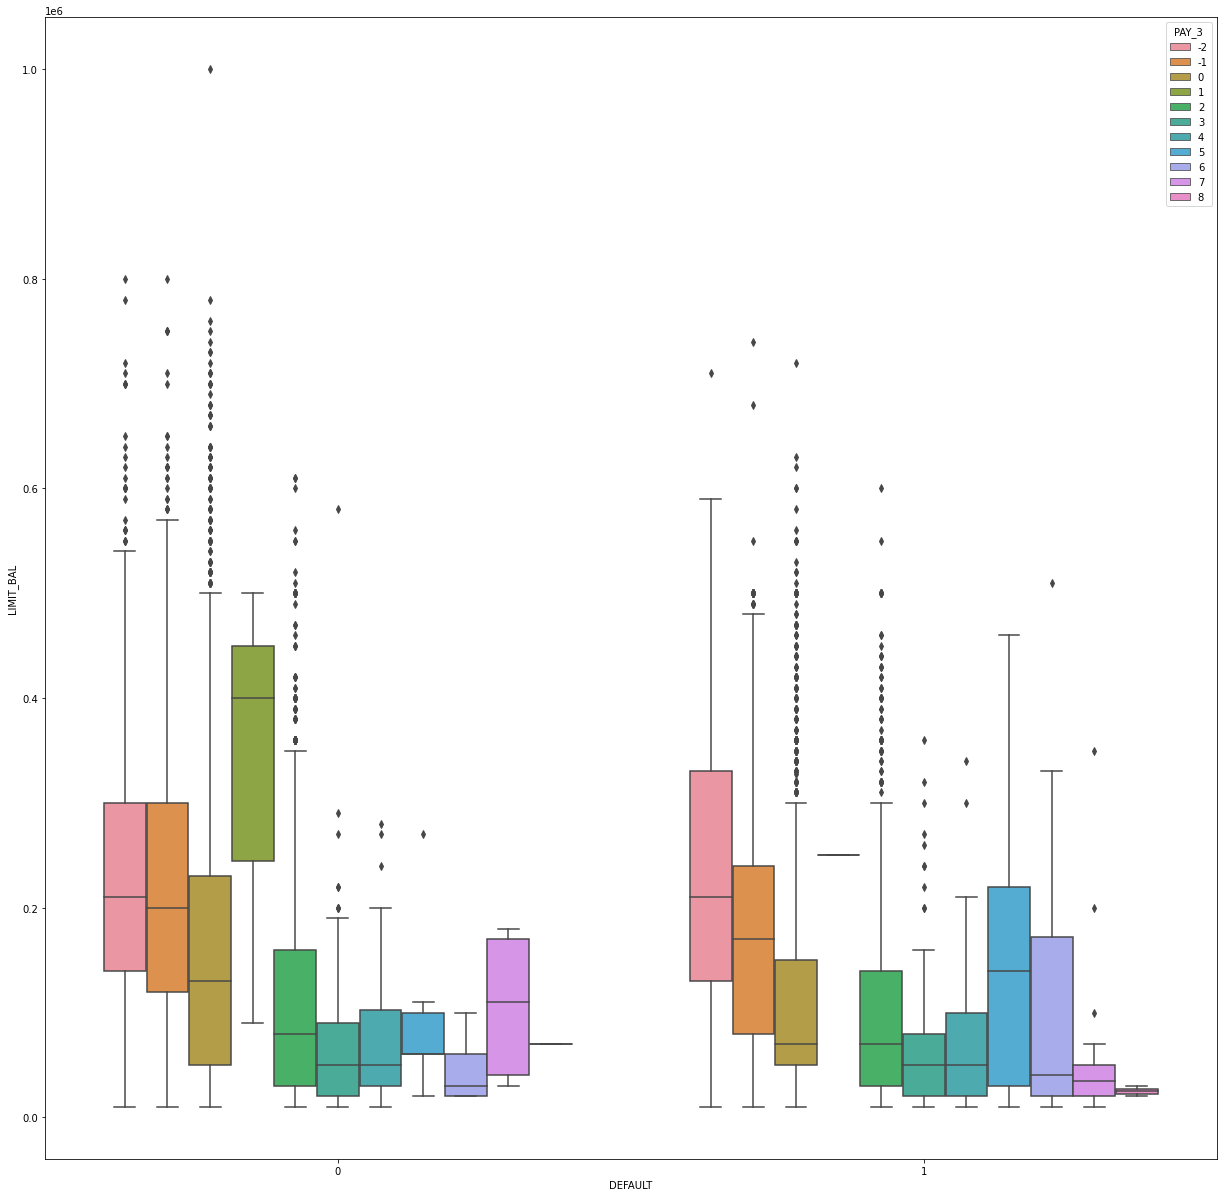

In [100]:



plt.figure(figsize = (21, 21))
sns.boxplot(data = df, y = "LIMIT_BAL", x = "DEFAULT", hue = 'PAY_3')
plt.show()

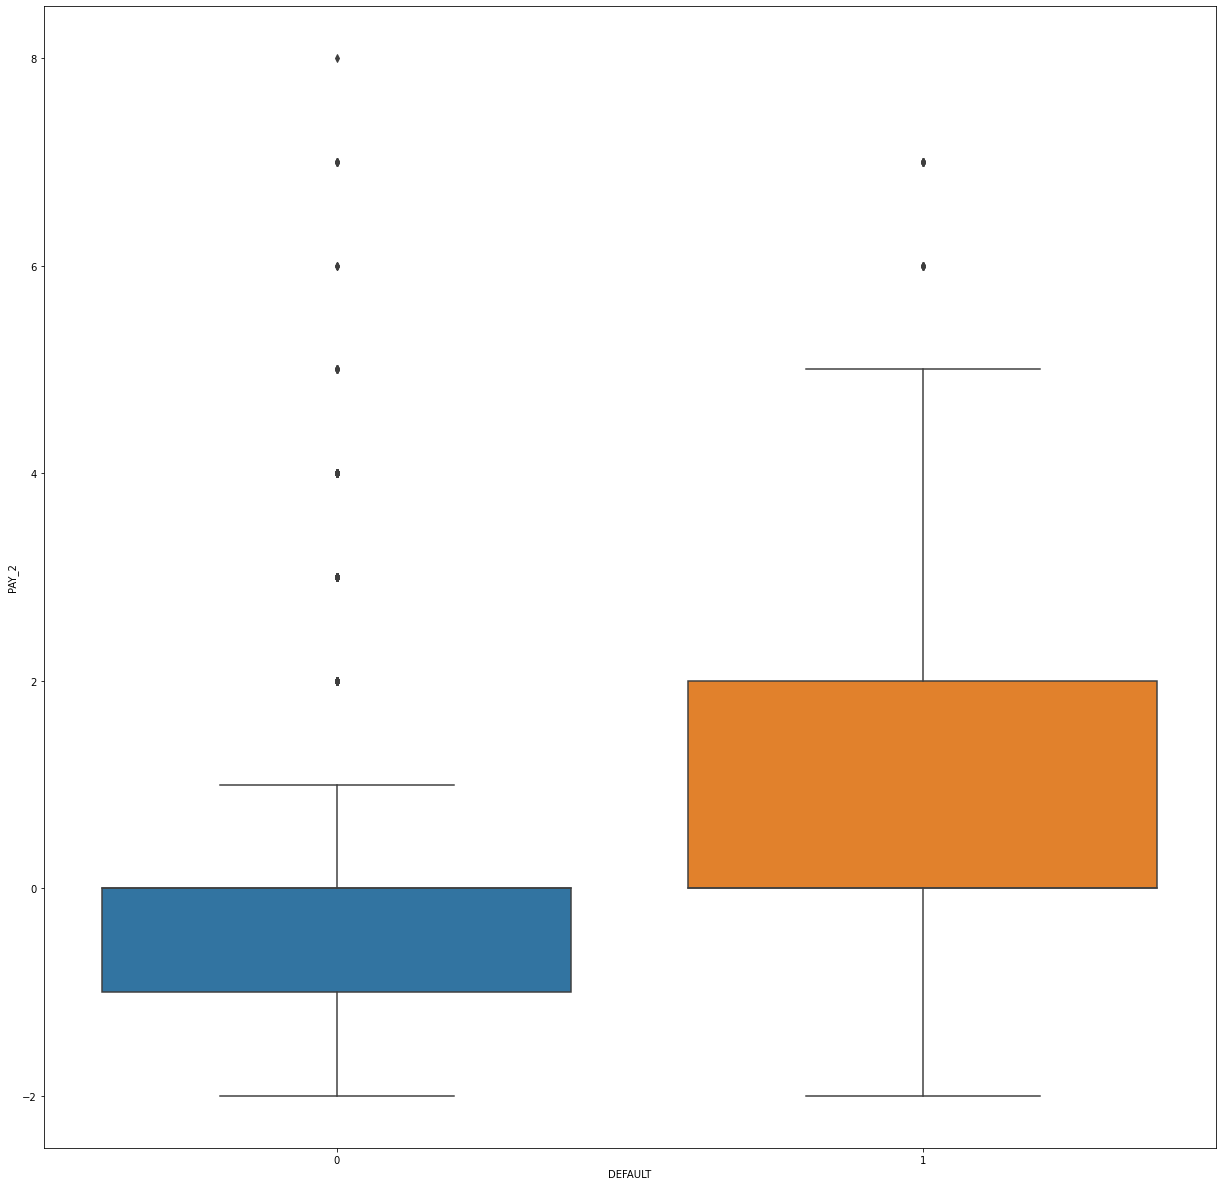

In [101]:
plt.figure(figsize = (21, 21))
sns.boxplot(data = df, y = "PAY_2", x = "DEFAULT")
plt.show()

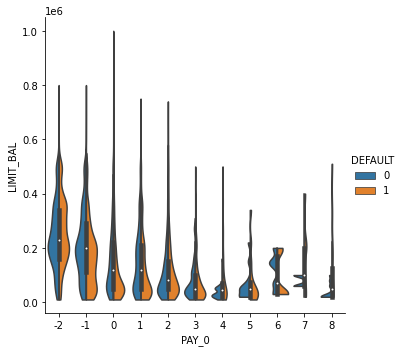

In [102]:
sns.catplot(
    data=df, x="PAY_0", y="LIMIT_BAL", hue="DEFAULT",
    kind="violin", bw=.25, cut=0, split=True,
)
plt.show()

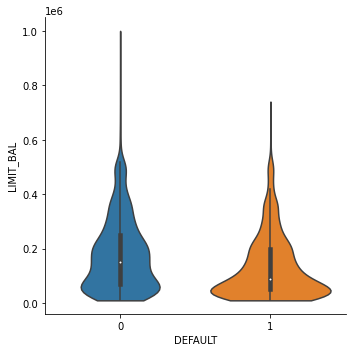

In [103]:
sns.catplot(
    data=df, x="DEFAULT", y="LIMIT_BAL",
    kind="violin", bw=.25, cut=0, split=True,
)
plt.show()

In [104]:
def outlier_thresholds_iqr(df, feature, th1, th3):
    Q1 = df[feature].quantile(th1)
    Q3 = df[feature].quantile(th3)
    IQR = Q3 - Q1
    upper_limit = Q3 +  IQR
    lower_limit = Q1 -  IQR
    return upper_limit, lower_limit

In [105]:
for i in df.columns:
    if i != 'Outcome':
        print('################################')
        print(i, ":", outlier_thresholds_iqr(df, i, th1=0.25, th3=0.85))
    else:
        pass

################################
LIMIT_BAL : (570000.0, -210000.0)
################################
SEX : (3.0, 0.0)
################################
EDUCATION : (5.0, -1.0)
################################
MARRIAGE : (3.0, 0.0)
################################
AGE : (64.0, 10.0)
################################
PAY_0 : (3.0, -3.0)
################################
PAY_2 : (1.0, -2.0)
################################
PAY_3 : (1.0, -2.0)
################################
PAY_4 : (1.0, -2.0)
################################
PAY_5 : (1.0, -2.0)
################################
PAY_6 : (1.0, -2.0)
################################
BILL_AMT1 : (210269.5499999999, -99796.64999999995)
################################
BILL_AMT2 : (202235.8499999998, -96640.7999999999)
################################
BILL_AMT3 : (193781.94999999995, -92891.59999999998)
################################
BILL_AMT4 : (179669.64999999997, -86344.69999999998)
################################
BILL_AMT5 : (168904.3999999

In [106]:
!pip3 install tabulate

In [107]:
from tabulate import tabulate

In [108]:
def check_outliers_iqr(df, feature):
    upper_limit, lower_limit = outlier_thresholds_iqr(df, feature, th1=0.25, th3=0.85)
    if df[(df[feature] > upper_limit) | (df[feature] < lower_limit)].any(axis=None):
        return True
    else:
        return False

In [109]:
def replace_with_thresholds_iqr(df, features, th1=0.25, th3=0.85, replace = True):
    data = []
    for feature in features:
        if feature != 'Outcome':
            outliers = check_outliers_iqr(df, feature)
            count = None
            upper_limit, lower_limit = outlier_thresholds_iqr(df, feature, th1=0.25, th3=0.85)
            if outliers:
                count = df[(df[feature] > upper_limit) | (df[feature] < lower_limit)][feature].count()
                if replace:
                    if lower_limit < 0:
                        df.loc[(df[feature] > upper_limit), feature] = upper_limit
                    else:
                        df.loc[(df[feature] < lower_limit), feature] = lower_limit
                        df.loc[(df[feature] > upper_limit), feature] = upper_limit
            outliers_status = check_outliers_iqr(df, feature)
            data.append([outliers, outliers_status, count, feature, upper_limit, lower_limit ])
    table = tabulate(data, headers=['Outliers (Previously)', 'Outliers', 'Count', 'Column', 'upper_limit', 'lower_limit'], tablefmt='rst', numalign='right')
    print(table)


replace_with_thresholds_iqr(df, df.columns, th1=0.25, th3=0.85)

=======================  ==========  =======  =========  =============  =============
Outliers (Previously)    Outliers      Count  Column       upper_limit    lower_limit
=======================  ==========  =======  =========  =============  =============
True                     False           112  LIMIT_BAL         570000        -210000
False                    False                SEX                    3              0
True                     False            51  EDUCATION              5             -1
False                    False                MARRIAGE               3              0
True                     False           110  AGE                   64             10
True                     False           141  PAY_0                  3             -3
True                     False          4410  PAY_2                  1             -2
True                     False          4209  PAY_3                  1             -2
True                     False          3508  PAY_4   

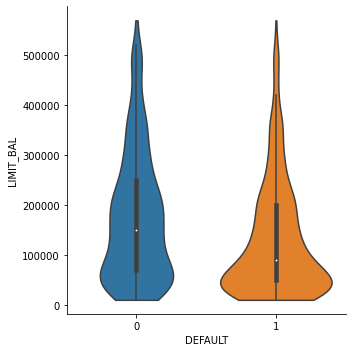

In [110]:
sns.catplot(
    data=df, x="DEFAULT", y="LIMIT_BAL",
    kind="violin", bw=.25, cut=0, split=True,
)
plt.show()

In [111]:
df['LIMIT_BAL'].mean(), df['LIMIT_BAL'].std()

(167181.32266666667, 128644.8854057372)

In [112]:
upper = df['LIMIT_BAL'].mean() + (3 * df['LIMIT_BAL'].std())

In [113]:
upper

553115.9788838782

In [114]:
lower = df['LIMIT_BAL'].mean() - (3 * df['LIMIT_BAL'].std())
lower

-218753.3335505449

In [115]:
index_outliner = df[df['LIMIT_BAL'] > upper].index 
index_outliner
#df.drop(index_outliner, axis = 0, inplace = True)

Int64Index([   12,   433,   451,   527,   555,   737,   811,  1095,  1231,
             1347,
            ...
            28715, 28822, 29011, 29136, 29404, 29571, 29740, 29861, 29886,
            29963],
           dtype='int64', length=130)

In [116]:
from scipy.stats import zscore
indexs = zscore((df.LIMIT_BAL)) > 3.0 

In [117]:
values = list()
for i in df.index:
    if df['DEFAULT'][i] == 1:
        values.append(i)

len(values)    

6636

In [118]:
indexs = zscore(df['LIMIT_BAL'].loc[values]) > 3.0
indexs.value_counts()

False    6518
True      118
Name: LIMIT_BAL, dtype: int64

In [119]:
values = list()
for i in indexs.index:
    if indexs[i] == True:
        values.append(i)
len(values)    

118

In [120]:
len(df['LIMIT_BAL'])

30000

In [ ]:
df.drop(values, axis = 0, inplace = True)
df

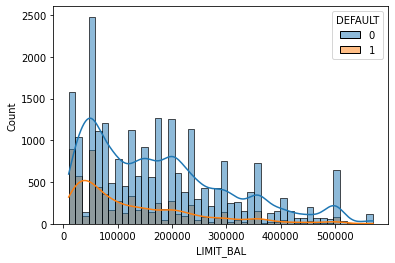

In [122]:
sns.histplot(data = df, x = 'LIMIT_BAL', hue = 'DEFAULT', kde = True)
plt.show()

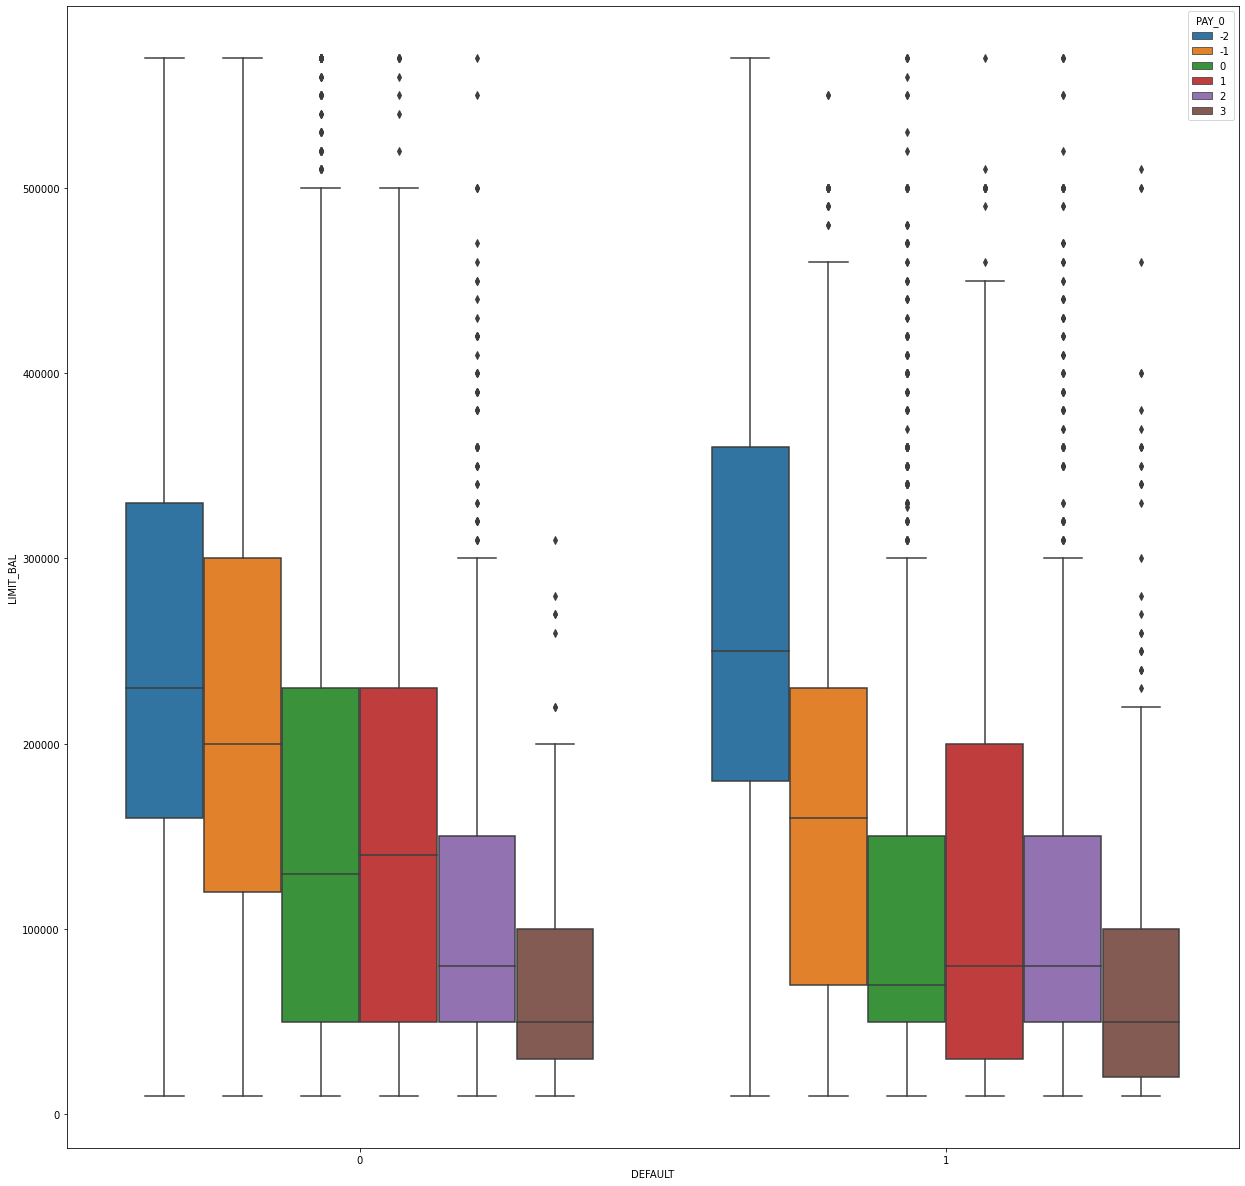

In [123]:
plt.figure(figsize = (21, 21))
sns.boxplot(data = df, y = "LIMIT_BAL", x = "DEFAULT", hue = "PAY_0")
plt.show()

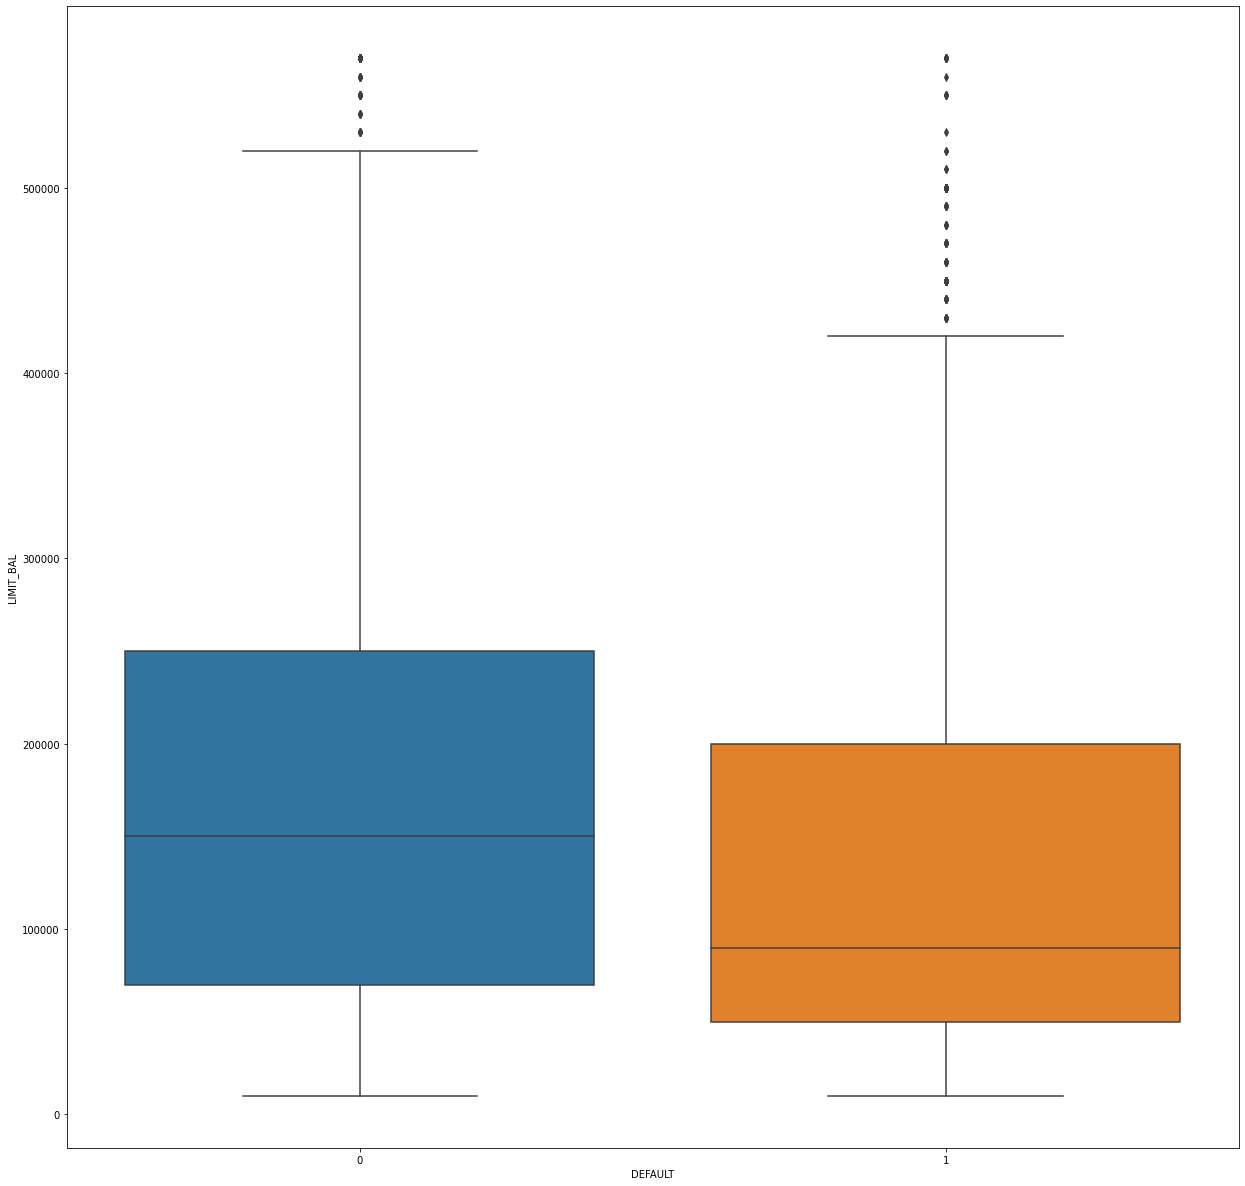

In [124]:
plt.figure(figsize = (21, 21))
sns.boxplot(data = df, y = "LIMIT_BAL", x = "DEFAULT")
plt.show()

<Figure size 3600x3600 with 0 Axes>

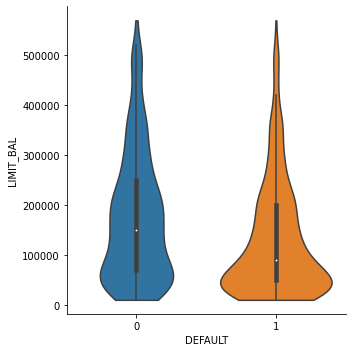

In [126]:
plt.figure(figsize = (50, 50))
sns.catplot(
    data=df, x="DEFAULT", y="LIMIT_BAL",
    kind="violin", bw=.25, cut=0, split=True,
)
plt.show()

In [127]:
df.PAY_0.value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      463
Name: PAY_0, dtype: int64

In [128]:
df.corr()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
LIMIT_BAL,1.000000,0.025231,-0.222233,-0.108656,0.144708,-0.278014,-0.308989,-0.295787,-0.271892,-0.248991,...,0.244302,0.247026,0.240857,0.347649,0.356306,0.359132,0.349294,0.354384,0.371373,-0.154080
SEX,0.025231,1.000000,0.014793,-0.031389,-0.090919,-0.056493,-0.072697,-0.067929,-0.059187,-0.052231,...,-0.018265,-0.014006,-0.011852,-0.004291,0.004512,0.010397,0.007990,0.011149,0.022361,-0.039961
EDUCATION,-0.222233,0.014793,1.000000,-0.144653,0.175115,0.108046,0.139035,0.133575,0.125059,0.112292,...,0.011992,0.004044,0.003005,-0.068401,-0.069863,-0.070738,-0.072482,-0.076030,-0.075179,0.028625
MARRIAGE,-0.108656,-0.031389,-0.144653,1.000000,-0.415027,0.020959,0.038079,0.043236,0.045529,0.047664,...,-0.019851,-0.021531,-0.017736,-0.015081,-0.024544,-0.019861,-0.020448,-0.019189,-0.020655,-0.024339
AGE,0.144708,-0.090919,0.175115,-0.415027,1.000000,-0.041939,-0.065033,-0.065494,-0.063639,-0.065852,...,0.037672,0.034915,0.033045,0.041010,0.048713,0.041446,0.045552,0.040230,0.035786,0.013795
PAY_0,-0.278014,-0.056493,0.108046,0.020959,-0.041939,1.000000,0.630216,0.557465,0.521358,0.492534,...,0.207415,0.205985,0.203123,-0.120696,-0.116804,-0.103512,-0.082050,-0.076148,-0.088661,0.328366
PAY_2,-0.308989,-0.072697,0.139035,0.038079,-0.065033,0.630216,1.000000,0.818401,0.730501,0.688620,...,0.334224,0.326228,0.321310,-0.028670,-0.010055,-0.011227,0.003432,0.010860,0.000394,0.198735
PAY_3,-0.295787,-0.067929,0.133575,0.043236,-0.065494,0.557465,0.818401,1.000000,0.821493,0.738488,...,0.351885,0.341132,0.333785,0.107977,-0.025410,0.002078,0.021656,0.030517,0.013753,0.178050
PAY_4,-0.271892,-0.059187,0.125059,0.045529,-0.063639,0.521358,0.730501,0.821493,1.000000,0.842988,...,0.383183,0.369784,0.359772,0.085368,0.121378,-0.007334,0.037894,0.055757,0.043168,0.157697
PAY_5,-0.248991,-0.052231,0.112292,0.047664,-0.065852,0.492534,0.688620,0.738488,0.842988,1.000000,...,0.411667,0.399949,0.384718,0.082505,0.104652,0.131305,0.026282,0.068277,0.063611,0.144087


In [129]:
df.corr(method='kendall')['DEFAULT']

LIMIT_BAL   -0.141089
SEX         -0.039961
EDUCATION    0.042065
MARRIAGE    -0.026330
AGE          0.004273
PAY_0        0.267936
PAY_2        0.201726
PAY_3        0.180968
PAY_4        0.161721
PAY_5        0.148550
PAY_6        0.132547
BILL_AMT1   -0.020904
BILL_AMT2   -0.012889
BILL_AMT3   -0.010520
BILL_AMT4   -0.006934
BILL_AMT5   -0.005714
BILL_AMT6   -0.000128
PAY_AMT1    -0.133195
PAY_AMT2    -0.125428
PAY_AMT3    -0.116149
PAY_AMT4    -0.106780
PAY_AMT5    -0.097640
PAY_AMT6    -0.101978
DEFAULT      1.000000
Name: DEFAULT, dtype: float64

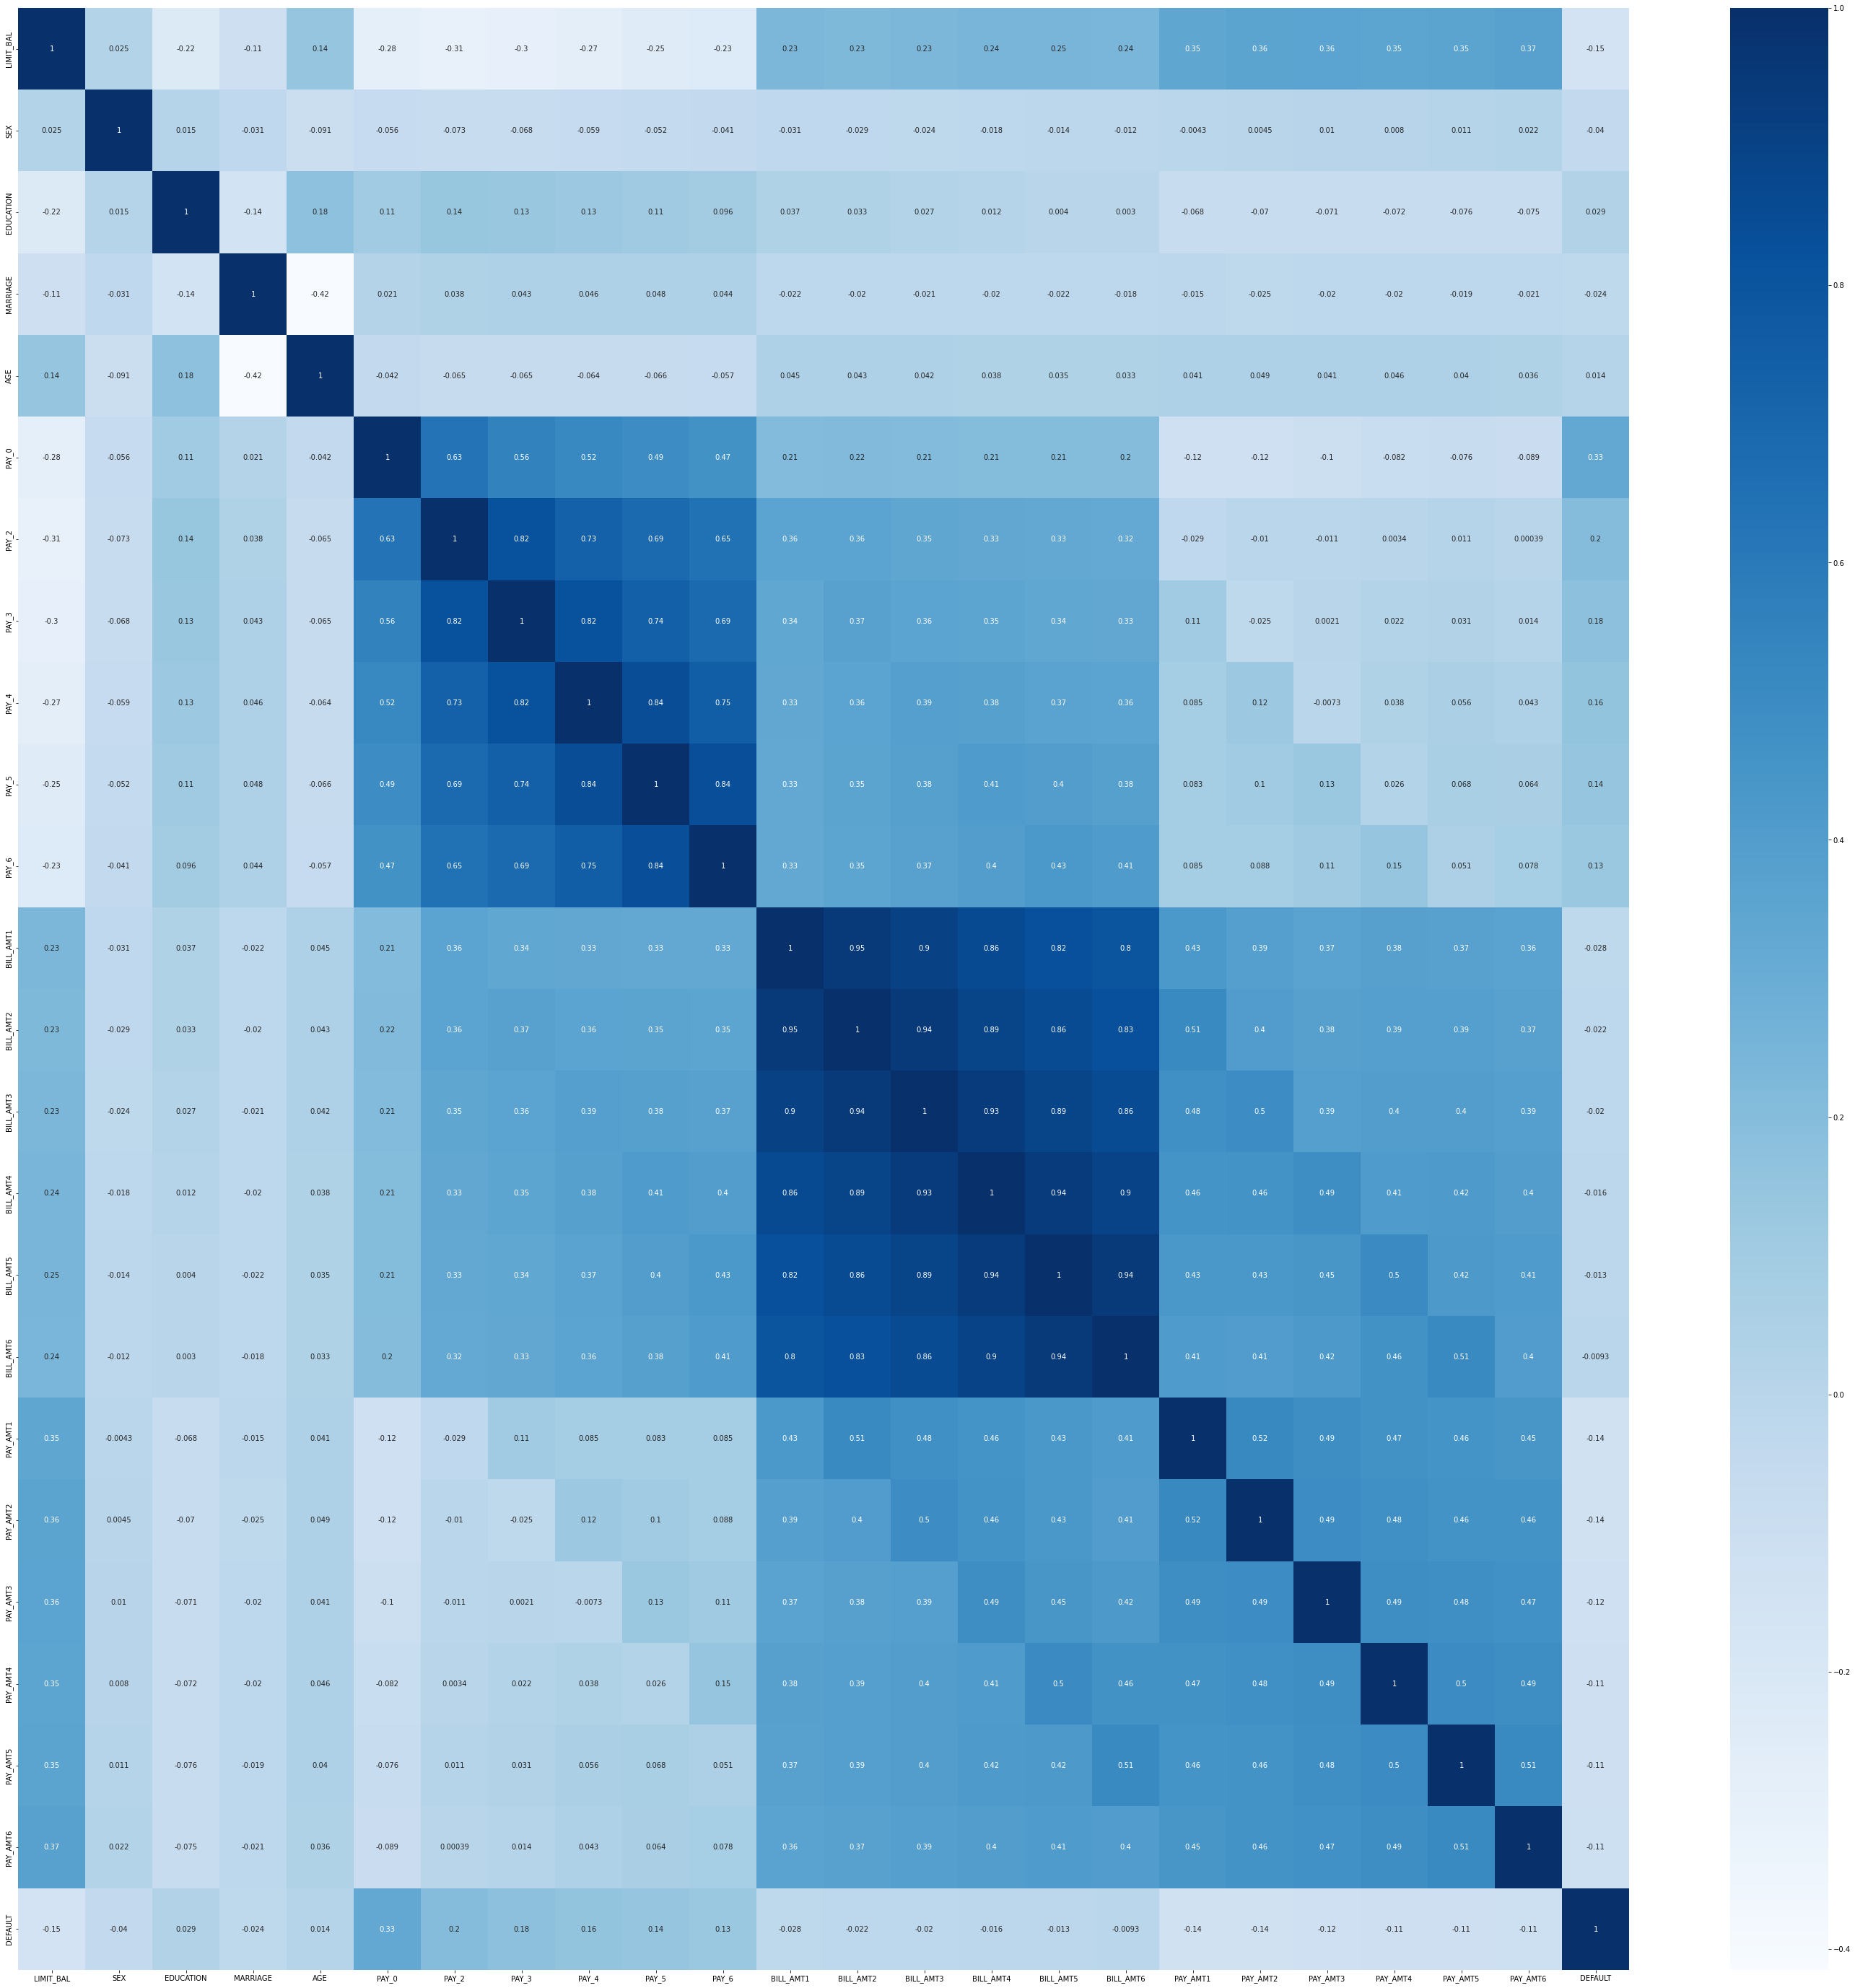

In [130]:
plt.figure(figsize=(50, 50))
sns.heatmap(df.corr(), annot = True, cmap = "Blues")
plt.show()

In [131]:
col = ['LIMIT_BAL','PAY_0', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [132]:
def skewness(df, positive_skewness_columns=['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']):
    if (set(positive_skewness_columns).issubset(df.columns)):
        df[positive_skewness_columns] = np.cbrt(df[positive_skewness_columns])
        return df
    else:
        print("Features are not present")
        return df

In [133]:
skewness(df)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,27.144176,2,2,1,24,2,1,-1,-1,-2,...,0.000000,0.000000,0.000000,0.000000,8.832285,0.000000,0.000000,0.000000,0.000000,1
1,49.324241,2,2,2,26,-1,1,0,0,0,...,14.845828,15.117594,14.829173,0.000000,10.000000,10.000000,10.000000,0.000000,12.599210,1
2,44.814047,2,2,2,34,0,0,0,0,0,...,24.289887,24.633589,24.959401,11.492749,11.447142,10.000000,10.000000,10.000000,17.099759,0
3,36.840315,2,2,1,37,0,0,0,0,0,...,30.478979,30.708683,30.915134,12.599210,12.638982,10.626586,10.322801,10.224904,10.000000,0
4,36.840315,1,2,1,57,-1,0,-1,0,0,...,27.562941,26.752191,26.745203,12.599210,24.705505,21.544347,20.800838,8.832285,8.789347,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,60.368107,1,3,1,39,0,0,0,0,0,...,44.480276,31.493658,25.187917,20.408276,24.705505,17.103179,14.497423,17.099759,10.000000,0
29996,53.132928,1,3,2,43,-1,-1,-1,-1,0,...,20.784647,17.313669,0.000000,12.247188,15.220448,20.799297,5.052774,0.000000,0.000000,0
29997,31.072325,1,2,2,37,3,1,1,-1,0,...,27.535711,27.404961,26.850107,0.000000,0.000000,23.875513,16.134286,12.599210,14.580997,1
29998,43.088694,1,3,1,41,1,-1,0,0,0,...,37.509390,22.801698,36.579112,24.662121,15.050202,10.561244,12.441863,23.077308,12.173408,1


In [134]:
smote = SMOTE(random_state=42)
x, y = smote.fit_resample(df[col], df['DEFAULT'])

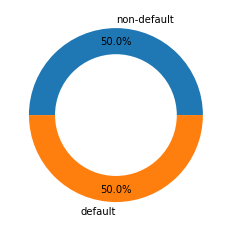

In [135]:
label = ['non-default', 'default']
plt.pie(y.value_counts(), labels=label,
        autopct='%1.1f%%', pctdistance=0.85)
donut_plot = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(donut_plot)

In [136]:
df.skew()

LIMIT_BAL    0.014225
SEX         -0.424183
EDUCATION    0.864657
MARRIAGE    -0.018742
AGE          0.694525
PAY_0        0.329110
PAY_2       -0.506826
PAY_3       -0.506197
PAY_4       -0.554303
PAY_5       -0.595297
PAY_6       -0.525910
BILL_AMT1   -0.000637
BILL_AMT2   -0.037003
BILL_AMT3   -0.045924
BILL_AMT4   -0.045977
BILL_AMT5   -0.024738
BILL_AMT6   -0.020005
PAY_AMT1    -0.363320
PAY_AMT2    -0.312197
PAY_AMT3    -0.201786
PAY_AMT4    -0.141053
PAY_AMT5    -0.148971
PAY_AMT6    -0.120955
DEFAULT      1.343504
dtype: float64

In [137]:
df.corr()['DEFAULT']

LIMIT_BAL   -0.170388
SEX         -0.039961
EDUCATION    0.028625
MARRIAGE    -0.024339
AGE          0.013795
PAY_0        0.328366
PAY_2        0.198735
PAY_3        0.178050
PAY_4        0.157697
PAY_5        0.144087
PAY_6        0.130339
BILL_AMT1   -0.025716
BILL_AMT2   -0.016169
BILL_AMT3   -0.014172
BILL_AMT4   -0.010590
BILL_AMT5   -0.009424
BILL_AMT6   -0.002424
PAY_AMT1    -0.170176
PAY_AMT2    -0.157086
PAY_AMT3    -0.143188
PAY_AMT4    -0.129155
PAY_AMT5    -0.116995
PAY_AMT6    -0.120920
DEFAULT      1.000000
Name: DEFAULT, dtype: float64

In [138]:
from sklearn.model_selection import train_test_split

In [139]:
x_train, x_test, y_train, y_test = train_test_split(df[col], df['DEFAULT'], test_size = 0.3, random_state = 42)

In [140]:
x_train.shape

(21000, 12)

In [141]:
x_test.shape

(9000, 12)

In [142]:
x_train

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
28465,62.144650,-2,-2,-2,-2,-2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
27622,36.840315,-1,-1,-1,-1,-1,13.658399,13.240114,16.868653,21.407026,8.706588,14.390374
28376,36.840315,2,1,1,1,0,0.000000,16.750687,0.000000,12.607604,15.182945,0.000000
10917,58.480355,3,1,1,1,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
27234,62.144650,-1,-1,-1,0,-1,12.634808,24.705505,10.384988,23.086004,23.077308,23.072393
...,...,...,...,...,...,...,...,...,...,...,...,...
29802,36.840315,0,0,0,0,0,12.599210,14.422496,11.674100,4.160168,10.428080,23.072393
5390,58.480355,2,1,1,1,1,23.811016,18.171206,0.000000,19.574338,18.171206,15.874011
860,36.840315,-2,-2,-2,-2,-2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
15795,41.212853,0,0,0,0,1,14.422496,12.599210,16.509636,10.626586,0.000000,10.626586


In [143]:
x_train.corr()

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
LIMIT_BAL,1.000000,-0.290342,-0.331437,-0.316968,-0.291714,-0.265837,0.226729,0.231302,0.246413,0.248416,0.265418,0.293508
PAY_0,-0.290342,1.000000,0.632536,0.561936,0.523860,0.492572,-0.116026,-0.079887,-0.059613,-0.037164,-0.031265,-0.045749
PAY_2,-0.331437,0.632536,1.000000,0.820501,0.730771,0.690077,0.058249,0.122088,0.122459,0.122291,0.117535,0.101654
PAY_3,-0.316968,0.561936,0.820501,1.000000,0.823929,0.742653,0.260729,0.096208,0.147886,0.155893,0.153284,0.128160
PAY_4,-0.291714,0.523860,0.730771,0.823929,1.000000,0.843617,0.224031,0.300324,0.133003,0.187926,0.196333,0.174254
PAY_5,-0.265837,0.492572,0.690077,0.742653,0.843617,1.000000,0.208693,0.268049,0.315665,0.168006,0.225365,0.206837
PAY_AMT1,0.226729,-0.116026,0.058249,0.260729,0.224031,0.208693,1.000000,0.476176,0.496368,0.458354,0.432408,0.420475
PAY_AMT2,0.231302,-0.079887,0.122088,0.096208,0.300324,0.268049,0.476176,1.000000,0.487978,0.496412,0.464819,0.456130
PAY_AMT3,0.246413,-0.059613,0.122459,0.147886,0.133003,0.315665,0.496368,0.487978,1.000000,0.485963,0.509794,0.478784
PAY_AMT4,0.248416,-0.037164,0.122291,0.155893,0.187926,0.168006,0.458354,0.496412,0.485963,1.000000,0.500136,0.526046


In [144]:
x_train.describe()

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,21000.000000,21000.00000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,51.082886,-0.02519,-0.304095,-0.330524,-0.361190,-0.389000,12.473266,12.341529,11.441304,10.862217,10.826340,10.674149
std,14.780492,1.08783,0.872512,0.878679,0.869322,0.859956,7.287573,7.290191,7.292748,7.211914,7.272616,7.353296
min,21.544347,-2.00000,-2.000000,-2.000000,-2.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.840315,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,9.904082,9.581932,7.306144,6.601941,6.223084,5.289572
50%,51.924941,0.00000,0.000000,0.000000,0.000000,0.000000,12.805792,12.622267,12.164404,11.447142,11.447142,11.447142
75%,62.144650,0.00000,0.000000,0.000000,0.000000,0.000000,17.112290,17.099759,16.534973,15.875333,15.951022,15.874011
max,82.913443,3.00000,1.000000,1.000000,1.000000,1.000000,24.662121,24.705505,23.875513,23.086004,23.077308,23.072393


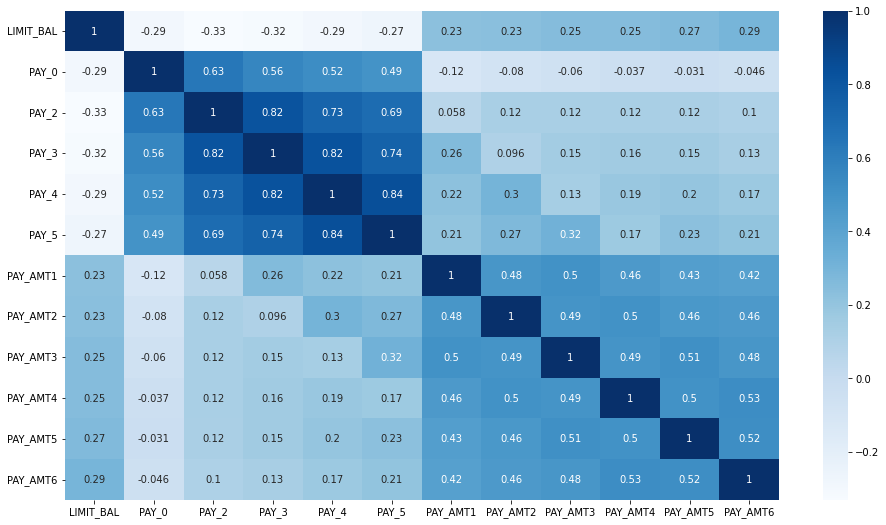

In [145]:
plt.figure(figsize=(16, 9))
sns.heatmap(x_train.corr(), annot = True, cmap = "Blues")
plt.show()

In [146]:
df.DEFAULT.value_counts()

0    23364
1     6636
Name: DEFAULT, dtype: int64

In [147]:
cols = ['LIMIT_BAL','PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [148]:
from sklearn.preprocessing import MinMaxScaler

In [149]:
mn = MinMaxScaler()

In [150]:
x_train[cols] = mn.fit_transform(np.array(x_train[cols]))

In [151]:
x_test[cols] = mn.fit_transform(np.array(x_test[cols]))

In [152]:
x_train

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
28465,0.661576,-2,-2,-2,-2,-2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
27622,0.249245,-1,-1,-1,-1,-1,0.553821,0.535918,0.706525,0.927273,0.377279,0.623705
28376,0.249245,2,1,1,1,0,0.000000,0.678014,0.000000,0.546115,0.657917,0.000000
10917,0.601867,3,1,1,1,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
27234,0.661576,-1,-1,-1,0,-1,0.512316,1.000000,0.434964,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
29802,0.249245,0,0,0,0,0,0.510873,0.583777,0.488957,0.180203,0.451876,1.000000
5390,0.601867,2,1,1,1,1,0.965489,0.735512,0.000000,0.847888,0.787406,0.688009
860,0.249245,-2,-2,-2,-2,-2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
15795,0.320495,0,0,0,0,1,0.584804,0.509976,0.691488,0.460304,0.000000,0.460576


In [153]:
x_test

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
2308,0.155257,0,0,0,0,0,0.464159,0.509976,0.479451,0.495848,0.496035,0.546073
22404,0.514731,0,0,0,0,0,0.668738,0.654873,0.614689,0.599196,0.601078,0.601206
23397,0.320495,0,0,0,0,0,0.545211,0.590953,0.604071,0.582992,0.588114,0.592444
25058,0.474402,0,0,0,0,0,0.475238,0.493105,0.801744,0.129949,0.829357,0.710648
2664,0.249245,0,0,0,0,0,0.510873,0.463344,0.418839,0.526917,0.000000,0.433418
...,...,...,...,...,...,...,...,...,...,...,...,...
3941,0.859476,1,-1,-1,-2,-2,0.968365,0.000000,0.000000,0.000000,0.378419,0.000000
17854,0.617491,0,0,0,0,0,0.810960,0.692144,0.664866,0.624729,0.866652,0.625098
95,0.379176,0,0,0,0,0,0.622653,0.620183,0.442471,0.448766,0.447855,0.453165
6279,0.632627,0,0,0,0,0,0.697953,0.699585,0.725444,0.758630,0.776809,0.760206


In [154]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [155]:
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)


In [352]:
from sklearn.decomposition import PCA

In [80]:
n_comp=min(len(x_train), len(x_train.columns))
n_comp

5

In [81]:
pca = PCA(n_components=2)

In [82]:
x_train = pca.fit_transform(x_train)
x_test = pca.fit_transform(x_test)

In [156]:
from sklearn.ensemble import RandomForestClassifier

In [167]:
rg = RandomForestClassifier(n_estimators=500, criterion='gini')

In [64]:
from sklearn.model_selection import GridSearchCV
parameters=[{'max_depth':[2,3,4,5,6],'n_estimators':[200, 300, 400, 500, 600], 'criterion':['gini', 'entropy', 'log_loss']}]
            
gscv=GridSearchCV(rg,parameters,scoring='accuracy')
grid_search=gscv.fit(x_train,y_train)
grid_search.best_params_

KeyboardInterrupt: 

In [168]:
rg.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500)

In [169]:
y_pred = rg.predict(x_test)

In [170]:
from sklearn.metrics import classification_report

In [171]:
print("Classification Report: \n ", classification_report(y_test, y_pred))

Classification Report: 
                precision    recall  f1-score   support

           0       0.84      0.94      0.89      7040
           1       0.62      0.37      0.46      1960

    accuracy                           0.81      9000
   macro avg       0.73      0.65      0.68      9000
weighted avg       0.79      0.81      0.80      9000



In [162]:
from sklearn.ensemble import AdaBoostClassifier

In [163]:
adb = AdaBoostClassifier(n_estimators = 500, learning_rate=0.001, random_state = 0)

In [164]:
adb.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=0.001, n_estimators=500, random_state=0)

In [165]:
y_adb_pred = adb.predict(x_test)

In [166]:
print("Classification Report: \n ", classification_report(y_adb_pred, y_test))

Classification Report: 
                precision    recall  f1-score   support

           0       0.96      0.83      0.89      8090
           1       0.32      0.69      0.44       910

    accuracy                           0.82      9000
   macro avg       0.64      0.76      0.66      9000
weighted avg       0.89      0.82      0.85      9000



In [178]:
from sklearn.ensemble import GradientBoostingClassifier

In [179]:
y_adb_pred = adb.predict(x_test)

In [180]:
gbc = GradientBoostingClassifier(n_estimators=500, learning_rate=0.01, max_depth=5)

In [181]:
gbc.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_estimators=500)

In [182]:
y_gbc_pred = gbc.predict(x_test)

In [183]:
print("Classification Report: \n ", classification_report(y_gbc_pred, y_test))

Classification Report: 
                precision    recall  f1-score   support

           0       0.95      0.84      0.89      7968
           1       0.35      0.67      0.46      1032

    accuracy                           0.82      9000
   macro avg       0.65      0.75      0.68      9000
weighted avg       0.88      0.82      0.84      9000



In [184]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
conf_m = confusion_matrix(y_adb_pred, y_pred)

In [185]:
conf_m[0]

array([7734,  356], dtype=int64)

In [186]:
from sklearn.metrics import roc_curve, roc_auc_score
roc_auc = roc_auc_score(y_test, y_gbc_pred)

In [187]:
roc_auc

0.6507522611317254

In [188]:
fpr, tpr, thrs = roc_curve(y_test, y_pred)

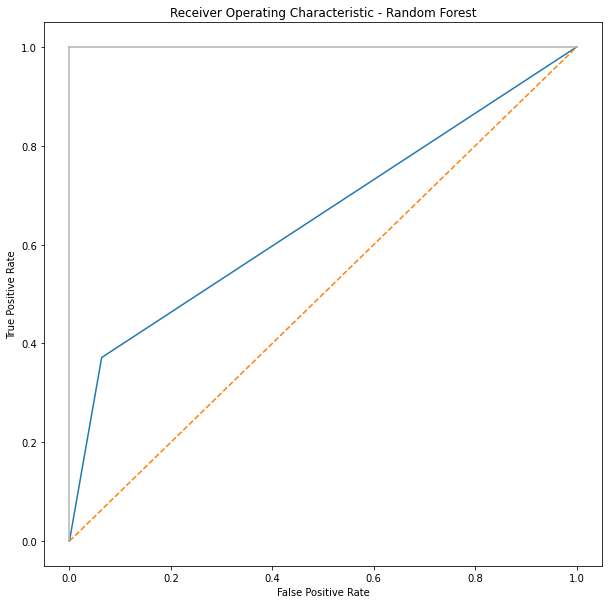

In [189]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Random Forest')
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()